In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
nadia = cv2.imread(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\Nadia_Murad.jpg', 0)
denis = cv2.imread(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\Denis_Mukwege.jpg', 0)
solvay = cv2.imread(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\solvay_conference.jpg', 0)

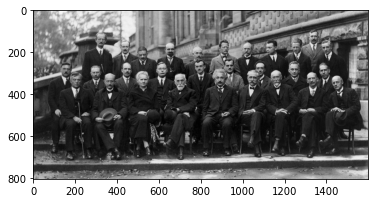

In [6]:
plt.imshow(solvay, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\haarcascades\haarcascade_frontalface_default.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img

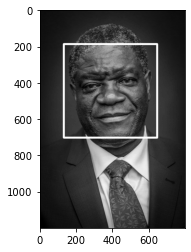

In [9]:
plt.imshow(detect_face(denis), cmap='gray')

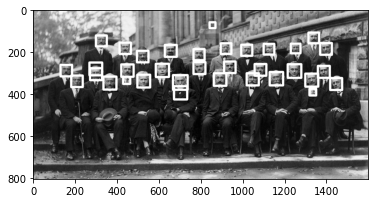

In [10]:
plt.imshow(detect_face(solvay), cmap='gray')

In [21]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor= 1.1, minNeighbors=5)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 10)
        
    return face_img

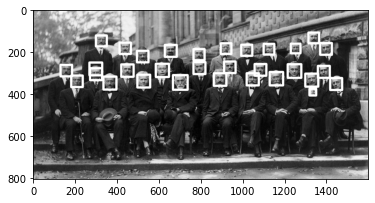

In [22]:
plt.imshow(adj_detect_face(solvay), cmap='gray')

In [23]:
eye_cascade = cv2.CascadeClassifier(r'C:\Users\junio\Desktop\OpenCV-master-v6_00\DATA\haarcascades\haarcascade_eye.xml')

In [27]:
def detect_eye(img):
    eye_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(eye_img)
    
    for(x,y,w,h) in eye_rects:
        cv2.rectangle(eye_img, (x,y), (x+w, y+h), (255, 255, 255), 10)
        
    return eye_img

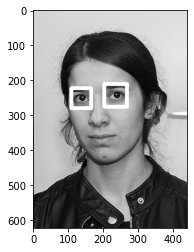

In [28]:
plt.imshow(detect_eye(nadia), cmap='gray')

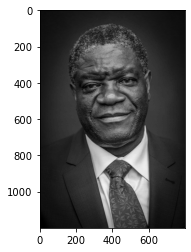

In [29]:
plt.imshow(detect_eye(denis), cmap='gray')

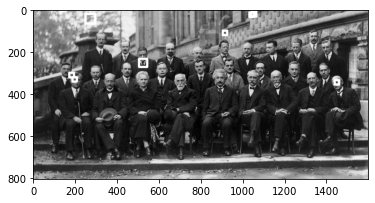

In [30]:
plt.imshow(detect_eye(solvay), cmap='gray')

In [31]:
#Bildidentifikation in Videostream

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    
    #Videostream zur definierter Funktion übergeben
    frame = adj_detect_face(frame)
    
    cv2.imshow('Video Bild Identification', frame)
    
    c = cv2.waitKey(1)
    
    #escape taste
    if c==27:
        break

cap.release()
cv2.destroyAllWindows()